In [1]:
import os 
from glob import glob

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# change dir to project dir
if 'changed' not in globals():
    os.chdir('../../../')
    changed = 1
    
outdir = 'results/paired_motifs/summary/'
os.makedirs(outdir, exist_ok=True)

In [2]:
# output directory for simulations
mp_data_dir = 'results/motif_pairs/Motif_Pairs_100000_only_chr/'
glob_path = mp_data_dir + '{SAMPLE_BATCH}/{SAMPLE_NAME}/Q_values_sig.top_50_count.tsv'
fns = glob(glob_path.format(SAMPLE_BATCH='*', SAMPLE_NAME='*'))

In [4]:
data = []
for fn in fns:

    sample_set, sample_name = fn.split('/')[-3:-1]

    tdf = pd.read_table(fn)
    tdf['sample_set'] = sample_set
    tdf['sample_name'] = sample_name
    data.append(tdf)

all_df = pd.concat(data)
all_df = all_df.loc[all_df['Q_value'] < 0.05]

In [5]:
# sort the pairs before working with them
def sort_pairs(sr):
    pairs_list = [sr.Motif1, sr.Motif2]
    return(sorted(pairs_list))
anchor_sorted_1, anchor_sorted_2 = zip(*all_df.apply(sort_pairs, axis=1))
all_df.loc[:, 'anchor_sorted_1'] = anchor_sorted_1
all_df.loc[:, 'anchor_sorted_2'] = anchor_sorted_2
all_df.loc[:, 'pair_sorted'] = all_df.loc[:, 'anchor_sorted_1'] + ',' + all_df.loc[:, 'anchor_sorted_2']

In [6]:
all_df.head()

,Motif1,Motif2,Sim_Count,P_value,Obs_Count,Contain_1,Contain_2,Q_value,sample_set,sample_name,anchor_sorted_1,anchor_sorted_2,pair_sorted
59,KLF16,SP3,93,0.00093,559,True,True,0.049290,a_plus,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens...,KLF16,SP3,"KLF16,SP3"
260,TFAP2C,ZNF320,88,0.00088,526,True,True,0.048506,a_plus,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens...,TFAP2C,ZNF320,"TFAP2C,ZNF320"
261,CTCF,TFAP2A,24,0.00024,537,True,True,0.022048,a_plus,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens...,CTCF,TFAP2A,"CTCF,TFAP2A"
386,TFAP2C,THAP11,8,0.00008,198,True,True,0.013780,a_plus,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens...,TFAP2C,THAP11,"TFAP2C,THAP11"
394,KLF4,THRA,37,0.00037,504,True,True,0.028326,a_plus,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens...,KLF4,THRA,"KLF4,THRA"


In [7]:
all_df[['sample_set', 'sample_name']].drop_duplicates().groupby('sample_set').count()

,sample_name
sample_set,
a_plus,30


### Summary of Motif Pairs

In [8]:
mp_grps = all_df.groupby(['sample_set', 'pair_sorted']) 
mp_counts_ss = mp_grps.count()['Sim_Count'].to_frame()
mp_counts_ss.sort_values(['sample_set', 'Sim_Count'], ascending=[True, False], inplace=True)

In [9]:
mp_counts_ss.loc['a_plus']

,Sim_Count
pair_sorted,
"ZNF135,ZNF460",28
"ZNF460,ZNF460",25
"THAP1,ZNF320",20
"THAP11,THAP11",20
"CTCF,ZNF320",19
...,...
"ZNF384,ZNF384",1
"ZNF384,ZNF768",1
"ZNF454,ZNF454",1


In [10]:
# mp_counts_ss.loc['b_plus']

In [11]:
# mp_counts_ss.loc['ctcf_test']

### Summary of 1D Motif

In [12]:
left_df = all_df.drop(['anchor_sorted_2'], axis=1).rename(columns={'anchor_sorted_1': 'Motif'})
right_df = all_df.drop(['anchor_sorted_1'], axis=1).rename(columns={'anchor_sorted_2': 'Motif'})
oned_motif_df = pd.concat([left_df, right_df])

In [13]:
oned_motif_df.head()

,Motif1,Motif2,Sim_Count,P_value,Obs_Count,Contain_1,Contain_2,Q_value,sample_set,sample_name,Motif,pair_sorted
59,KLF16,SP3,93,0.00093,559,True,True,0.049290,a_plus,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens...,KLF16,"KLF16,SP3"
260,TFAP2C,ZNF320,88,0.00088,526,True,True,0.048506,a_plus,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens...,TFAP2C,"TFAP2C,ZNF320"
261,CTCF,TFAP2A,24,0.00024,537,True,True,0.022048,a_plus,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens...,CTCF,"CTCF,TFAP2A"
386,TFAP2C,THAP11,8,0.00008,198,True,True,0.013780,a_plus,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens...,TFAP2C,"TFAP2C,THAP11"
394,KLF4,THRA,37,0.00037,504,True,True,0.028326,a_plus,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens...,KLF4,"KLF4,THRA"


In [14]:
motif_grps = oned_motif_df.groupby(['sample_set', 'Motif']) 
motif_counts_ss = motif_grps.count()['Sim_Count'].to_frame()
motif_counts_ss.sort_values(['sample_set', 'Sim_Count'], ascending=[True, False], inplace=True)

In [15]:
motif_counts_ss.loc['a_plus']

,Sim_Count
Motif,
CTCF,278
ZNF320,234
THAP1,194
KLF9,167
KLF4,157
ASCL1,153
ZNF460,133
KLF5,123
ZNF768,115


In [16]:
# motif_counts_ss.loc['b_plus']

In [17]:
# motif_counts_ss.loc['ctcf_test']

#### Making a jointplot of the motif-pair frequencies for different sample sets 

#####  A+ Samples

In [18]:
curr_sample_set = 'a_plus'

# extract the counts for the current set
a_plus_counts = mp_counts_ss.loc[curr_sample_set]

# take the top n only
topn = 30
a_plus_counts = a_plus_counts.sort_values('Sim_Count', ascending=False).iloc[0:topn]

# convert the index into two columns and sort 
left_anchors, right_anchors = list(zip(*map(lambda x: x.split(','), a_plus_counts.index)))
a_plus_counts['anchor_sorted_1'] = left_anchors
a_plus_counts['anchor_sorted_2'] = right_anchors
a_plus_counts.sort_values(['anchor_sorted_1', 'anchor_sorted_1'], ascending=[True, True], inplace=True)

# add reverse in order to have a symmetric matrix after pivoting 
a_plus_counts_rev = a_plus_counts.rename(columns={'anchor_sorted_1': 'anchor_sorted_2', 'anchor_sorted_2': 'anchor_sorted_1'})
a_plus_counts = pd.concat([a_plus_counts, a_plus_counts_rev])

# pivot the data into matrix for and fillna
a_plus_counts_matrix = a_plus_counts.pivot_table(index='anchor_sorted_2', columns='anchor_sorted_1', values='Sim_Count', fill_value=0)
#a_plus_counts_matrix.fillna(0, inplace=True)

# reverse the index values 
rev_index = list(reversed(sorted(a_plus_counts_matrix.index)))
a_plus_counts_matrix = a_plus_counts_matrix.loc[rev_index]

a_plus_counts_matrix.shape

(24, 24)

In [19]:
# calculate frequencies for the column panel
col_idxs = a_plus_counts_matrix.columns.tolist()
col_oned_motif_counts = motif_counts_ss.loc[curr_sample_set].loc[col_idxs].reset_index()

# calculate frequencies for the row panel
row_idxs = a_plus_counts_matrix.index.tolist()
row_oned_motif_counts = a_plus_counts_matrix.sum().loc[row_idxs].to_frame().reset_index()
row_oned_motif_counts.columns = ['Motif', 'topn_freq']

# calculating the number 
num_a_samples = all_df.loc[all_df.sample_set == curr_sample_set].drop_duplicates(['sample_set', 'sample_name']).shape[0]

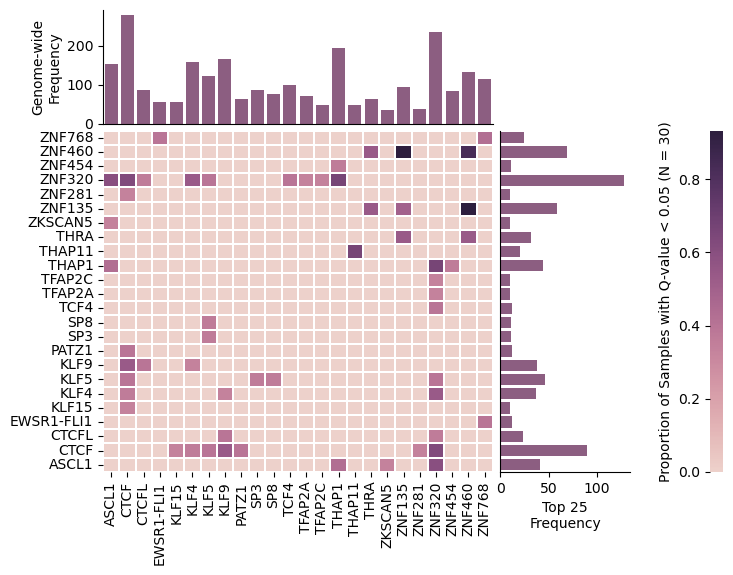

In [20]:
fig = plt.figure(figsize=(8, 6))

hspace = 0.03
wspace = 0.05

purple_rgb = tuple([0.57916573903086, 0.33934576125314425, 0.5219003947563425])

# making the gridspec and separating each piece
grid = GridSpec(2, 4, figure=fig, height_ratios=[1, 3], width_ratios=[3, 1, 0.5, 0.1], hspace=hspace, wspace=wspace)

top_panel = fig.add_subplot(grid[0, 0])
large_box = fig.add_subplot(grid[1, 0])

right_panel = fig.add_subplot(grid[1, 1])
legend_panel = fig.add_subplot(grid[1, 3])

# drawing a heatmap in the large box
#sns.heatmap(a_plus_counts_matrix, robust=False, ax=large_box, xticklabels=True, yticklabels=True, cbar_kws={'location': 'bottom'})
sns.heatmap(a_plus_counts_matrix / num_a_samples, robust=False, ax=large_box, 
            xticklabels=True, yticklabels=True,
            cbar=True, cbar_ax=legend_panel, 
            cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.003,
            cbar_kws={'label': 'Proportion of Samples with Q-value < 0.05 (N = {})'.format(num_a_samples), 'location': 'left'})
large_box.set(xlabel='', ylabel='')

# drawing a barplot of 1D motif frequencies across the whole genome
sns.barplot(x='Motif', y='Sim_Count', data=col_oned_motif_counts, color=purple_rgb, ax=top_panel)
top_panel.set(xticklabels=[], xlabel='', ylabel='Genome-wide\nFrequency', xticks=[])
sns.despine(ax=top_panel, right=True, top=True)

# drawing a barplot of 1D motif frequencies across the top 25 motif pairs
sns.barplot(y='Motif', x='topn_freq', data=row_oned_motif_counts, color=purple_rgb, ax=right_panel)
right_panel.set(yticklabels=[], ylabel='', xlabel='Top 25\nFrequency', yticks=[])
sns.despine(ax=right_panel, right=True, top=True)

# save the figure 
fn = os.path.join(outdir, 'motif_pair_distributions.{}.V1.png'.format(curr_sample_set))
fig.savefig(fn, dpi=600, bbox_inches='tight')

#####  B+ Samples

In [21]:
# curr_sample_set = 'b_plus'

# # extract the counts for the current set
# a_plus_counts = mp_counts_ss.loc[curr_sample_set]

# # take the top n only
# topn = 30
# a_plus_counts = a_plus_counts.sort_values('Sim_Count', ascending=False).iloc[0:topn]

# # convert the index into two columns and sort 
# left_anchors, right_anchors = list(zip(*map(lambda x: x.split(','), a_plus_counts.index)))
# a_plus_counts['anchor_sorted_1'] = left_anchors
# a_plus_counts['anchor_sorted_2'] = right_anchors
# a_plus_counts.sort_values(['anchor_sorted_1', 'anchor_sorted_1'], ascending=[True, True], inplace=True)

# # add reverse in order to have a symmetric matrix after pivoting 
# a_plus_counts_rev = a_plus_counts.rename(columns={'anchor_sorted_1': 'anchor_sorted_2', 'anchor_sorted_2': 'anchor_sorted_1'})
# a_plus_counts = pd.concat([a_plus_counts, a_plus_counts_rev])

# # pivot the data into matrix for and fillna
# a_plus_counts_matrix = a_plus_counts.pivot_table(index='anchor_sorted_2', columns='anchor_sorted_1', values='Sim_Count', fill_value=0)
# #a_plus_counts_matrix.fillna(0, inplace=True)

# # reverse the index values 
# rev_index = list(reversed(sorted(a_plus_counts_matrix.index)))
# a_plus_counts_matrix = a_plus_counts_matrix.loc[rev_index]

# a_plus_counts_matrix.shape

In [22]:
# # calculate frequencies for the column panel
# col_idxs = a_plus_counts_matrix.columns.tolist()
# col_oned_motif_counts = motif_counts_ss.loc[curr_sample_set].loc[col_idxs].reset_index()

# # calculate frequencies for the row panel
# row_idxs = a_plus_counts_matrix.index.tolist()
# row_oned_motif_counts = a_plus_counts_matrix.sum().loc[row_idxs].to_frame().reset_index()
# row_oned_motif_counts.columns = ['Motif', 'topn_freq']

# # calculating the number 
# num_a_samples = all_df.loc[all_df.sample_set == curr_sample_set].drop_duplicates(['sample_set', 'sample_name']).shape[0]

In [23]:
# fig = plt.figure(figsize=(8, 6))

# hspace = 0.03
# wspace = 0.05

# purple_rgb = tuple([0.57916573903086, 0.33934576125314425, 0.5219003947563425])

# # making the gridspec and separating each piece
# grid = GridSpec(2, 4, figure=fig, height_ratios=[1, 3], width_ratios=[3, 1, 0.5, 0.1], hspace=hspace, wspace=wspace)

# top_panel = fig.add_subplot(grid[0, 0])
# large_box = fig.add_subplot(grid[1, 0])

# right_panel = fig.add_subplot(grid[1, 1])
# legend_panel = fig.add_subplot(grid[1, 3])

# # drawing a heatmap in the large box
# #sns.heatmap(a_plus_counts_matrix, robust=False, ax=large_box, xticklabels=True, yticklabels=True, cbar_kws={'location': 'bottom'})
# sns.heatmap(a_plus_counts_matrix / num_a_samples, robust=False, ax=large_box, 
#             xticklabels=True, yticklabels=True,
#             cbar=True, cbar_ax=legend_panel, 
#             cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.003,
#             cbar_kws={'label': 'Proportion of Samples with Q-value < 0.05 (N = {})'.format(num_a_samples), 'location': 'left'})
# large_box.set(xlabel='', ylabel='')

# # drawing a barplot of 1D motif frequencies across the whole genome
# sns.barplot(x='Motif', y='Sim_Count', data=col_oned_motif_counts, color=purple_rgb, ax=top_panel)
# top_panel.set(xticklabels=[], xlabel='', ylabel='Genome-wide\nFrequency', xticks=[])
# sns.despine(ax=top_panel, right=True, top=True)

# # drawing a barplot of 1D motif frequencies across the top 25 motif pairs
# sns.barplot(y='Motif', x='topn_freq', data=row_oned_motif_counts, color=purple_rgb, ax=right_panel)
# right_panel.set(yticklabels=[], ylabel='', xlabel='Top 25\nFrequency', yticks=[])
# sns.despine(ax=right_panel, right=True, top=True)

# # save the figure 
# fn = os.path.join(outdir, 'motif_pair_distributions.{}.V1.png'.format(curr_sample_set))
# fig.savefig(fn, dpi=600, bbox_inches='tight')

##### CTCF Samples

In [24]:
# curr_sample_set = 'ctcf_test'

# # extract the counts for the current set
# a_plus_counts = mp_counts_ss.loc[curr_sample_set]

# # take the top n only
# topn = 30
# a_plus_counts = a_plus_counts.sort_values('Sim_Count', ascending=False).iloc[0:topn]

# # convert the index into two columns and sort 
# left_anchors, right_anchors = list(zip(*map(lambda x: x.split(','), a_plus_counts.index)))
# a_plus_counts['anchor_sorted_1'] = left_anchors
# a_plus_counts['anchor_sorted_2'] = right_anchors
# a_plus_counts.sort_values(['anchor_sorted_1', 'anchor_sorted_1'], ascending=[True, True], inplace=True)

# # add reverse in order to have a symmetric matrix after pivoting 
# a_plus_counts_rev = a_plus_counts.rename(columns={'anchor_sorted_1': 'anchor_sorted_2', 'anchor_sorted_2': 'anchor_sorted_1'})
# a_plus_counts = pd.concat([a_plus_counts, a_plus_counts_rev])

# # pivot the data into matrix for and fillna
# a_plus_counts_matrix = a_plus_counts.pivot_table(index='anchor_sorted_2', columns='anchor_sorted_1', values='Sim_Count', fill_value=0)
# #a_plus_counts_matrix.fillna(0, inplace=True)

# # reverse the index values 
# rev_index = list(reversed(sorted(a_plus_counts_matrix.index)))
# a_plus_counts_matrix = a_plus_counts_matrix.loc[rev_index]

# a_plus_counts_matrix.shape

In [25]:
# # calculate frequencies for the column panel
# col_idxs = a_plus_counts_matrix.columns.tolist()
# col_oned_motif_counts = motif_counts_ss.loc[curr_sample_set].loc[col_idxs].reset_index()

# # calculate frequencies for the row panel
# row_idxs = a_plus_counts_matrix.index.tolist()
# row_oned_motif_counts = a_plus_counts_matrix.sum().loc[row_idxs].to_frame().reset_index()
# row_oned_motif_counts.columns = ['Motif', 'topn_freq']

# # calculating the number 
# num_a_samples = all_df.loc[all_df.sample_set == curr_sample_set].drop_duplicates(['sample_set', 'sample_name']).sample_name.nunique()

In [26]:
# fig = plt.figure(figsize=(8, 6))

# hspace = 0.03
# wspace = 0.05

# purple_rgb = tuple([0.57916573903086, 0.33934576125314425, 0.5219003947563425])

# # making the gridspec and separating each piece
# grid = GridSpec(2, 4, figure=fig, height_ratios=[1, 3], width_ratios=[3, 1, 0.5, 0.1], hspace=hspace, wspace=wspace)

# top_panel = fig.add_subplot(grid[0, 0])
# large_box = fig.add_subplot(grid[1, 0])

# right_panel = fig.add_subplot(grid[1, 1])
# legend_panel = fig.add_subplot(grid[1, 3])

# # drawing a heatmap in the large box
# #sns.heatmap(a_plus_counts_matrix, robust=False, ax=large_box, xticklabels=True, yticklabels=True, cbar_kws={'location': 'bottom'})
# sns.heatmap(a_plus_counts_matrix / num_a_samples, robust=False, ax=large_box, 
#             xticklabels=True, yticklabels=True,
#             cbar=True, cbar_ax=legend_panel, 
#             cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.003,
#             cbar_kws={'label': 'Proportion of Samples with Q-value < 0.05 (N = {})'.format(num_a_samples), 'location': 'left'})
# large_box.set(xlabel='', ylabel='')

# # drawing a barplot of 1D motif frequencies across the whole genome
# sns.barplot(x='Motif', y='Sim_Count', data=col_oned_motif_counts, color=purple_rgb, ax=top_panel)
# top_panel.set(xticklabels=[], xlabel='', ylabel='Genome-wide\nFrequency', xticks=[])
# sns.despine(ax=top_panel, right=True, top=True)

# # drawing a barplot of 1D motif frequencies across the top 25 motif pairs
# sns.barplot(y='Motif', x='topn_freq', data=row_oned_motif_counts, color=purple_rgb, ax=right_panel)
# right_panel.set(yticklabels=[], ylabel='', xlabel='Top 25\nFrequency', yticks=[])
# sns.despine(ax=right_panel, right=True, top=True)

# # save the figure 
# fn = os.path.join(outdir, 'motif_pair_distributions.{}.V1.png'.format(curr_sample_set))
# fig.savefig(fn, dpi=600, bbox_inches='tight')

#####  A+/B+ Samples

In [27]:
# curr_sample_set = ['a_plus', 'b_plus']
# curr_sample_set_name = 'ab_plus'

# # extract the counts for the current set
# a_plus_counts = mp_counts_ss.loc[curr_sample_set]

# # take the top n only
# topn = 30
# a_plus_counts = a_plus_counts.sort_values('Sim_Count', ascending=False).iloc[0:topn]
# a_plus_counts = a_plus_counts.reset_index()
# a_plus_counts = a_plus_counts.drop('sample_set', axis=1).groupby('pair_sorted').Sim_Count.agg(sum).to_frame().reset_index()

In [28]:
# # convert the index into two columns and sort 
# left_anchors, right_anchors = list(zip(*map(lambda x: x.split(','), a_plus_counts.pair_sorted)))
# a_plus_counts['anchor_sorted_1'] = left_anchors
# a_plus_counts['anchor_sorted_2'] = right_anchors
# a_plus_counts.sort_values(['anchor_sorted_1', 'anchor_sorted_1'], ascending=[True, True], inplace=True)

# # add reverse in order to have a symmetric matrix after pivoting 
# a_plus_counts_rev = a_plus_counts.rename(columns={'anchor_sorted_1': 'anchor_sorted_2', 'anchor_sorted_2': 'anchor_sorted_1'})
# a_plus_counts = pd.concat([a_plus_counts, a_plus_counts_rev])

# # pivot the data into matrix for and fillna
# a_plus_counts_matrix = a_plus_counts.pivot_table(index='anchor_sorted_2', columns='anchor_sorted_1', values='Sim_Count', fill_value=0)

# # reverse the index values 
# rev_index = list(reversed(sorted(a_plus_counts_matrix.index)))
# a_plus_counts_matrix = a_plus_counts_matrix.loc[rev_index]
# a_plus_counts_matrix.shape

In [29]:
# # calculate frequencies for the column panel
# col_idxs = a_plus_counts_matrix.columns.tolist()
# col_oned_motif_counts = motif_counts_ss.loc[(['a_plus', 'b_plus'], col_idxs),:].reset_index()
# col_oned_motif_counts = col_oned_motif_counts.drop('sample_set', axis=1).groupby('Motif').Sim_Count.sum().reset_index()

# # calculate frequencies for the row panel
# row_idxs = a_plus_counts_matrix.index.tolist()
# row_oned_motif_counts = a_plus_counts_matrix.sum()
# row_oned_motif_counts = row_oned_motif_counts.loc[row_idxs].to_frame().reset_index()
# row_oned_motif_counts.columns = ['Motif', 'topn_freq']

# # calculating the number 
# num_a_samples = all_df.loc[all_df.sample_set.isin(curr_sample_set)].drop_duplicates(['sample_set', 'sample_name']).shape[0]

In [30]:
# fig = plt.figure(figsize=(8, 6))

# hspace = 0.03
# wspace = 0.05

# purple_rgb = tuple([0.57916573903086, 0.33934576125314425, 0.5219003947563425])

# # making the gridspec and separating each piece
# grid = GridSpec(2, 4, figure=fig, height_ratios=[1, 3], width_ratios=[3, 1, 0.5, 0.1], hspace=hspace, wspace=wspace)

# top_panel = fig.add_subplot(grid[0, 0])
# large_box = fig.add_subplot(grid[1, 0])

# right_panel = fig.add_subplot(grid[1, 1])
# legend_panel = fig.add_subplot(grid[1, 3])

# # drawing a heatmap in the large box
# #sns.heatmap(a_plus_counts_matrix, robust=False, ax=large_box, xticklabels=True, yticklabels=True, cbar_kws={'location': 'bottom'})
# sns.heatmap(a_plus_counts_matrix / num_a_samples, robust=False, ax=large_box, 
#             xticklabels=True, yticklabels=True,
#             cbar=True, cbar_ax=legend_panel, 
#             cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.003,
#             cbar_kws={'label': 'Proportion of Samples with Q-value < 0.05 (N = {})'.format(num_a_samples), 'location': 'left'})
# large_box.set(xlabel='', ylabel='')

# # drawing a barplot of 1D motif frequencies across the whole genome
# sns.barplot(x='Motif', y='Sim_Count', data=col_oned_motif_counts, color=purple_rgb, ax=top_panel)
# top_panel.set(xticklabels=[], xlabel='', ylabel='Genome-wide\nFrequency', xticks=[])
# sns.despine(ax=top_panel, right=True, top=True)

# # drawing a barplot of 1D motif frequencies across the top 25 motif pairs
# sns.barplot(y='Motif', x='topn_freq', data=row_oned_motif_counts, color=purple_rgb, ax=right_panel)
# right_panel.set(yticklabels=[], ylabel='', xlabel='Top 25\nFrequency', yticks=[])
# sns.despine(ax=right_panel, right=True, top=True)

# # save the figure 
# fn = os.path.join(outdir, 'motif_pair_distributions.{}.V1.png'.format(curr_sample_set_name))
# fig.savefig(fn, dpi=600, bbox_inches='tight')

### Comparing overlap between A+ and B+ samples 
Taking those samples that are the same and just calculate an overlap of the top motif pairs